# DATA ANALYSIS PYTHON PROJECT - MYNTRA ANALYSIS

# Import Libraries

In [1]:
import pandas as pd #data manipulation
import numpy as np #calculations
import matplotlib.pyplot as plt #basic visualizations
import seaborn as sns #adv visualization

### Import Row Data

In [2]:
products = pd.read_excel("C:/Datasets/Myntra dataset.xlsx", sheet_name="dim_products")
products.head()

,Product ID,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,P0001,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,P0002,Women,Topwear,T-Shirts,Roadster,40,Blue,5
2,P0003,Women,Topwear,T-Shirts,Roadster,42,White,3
3,P0004,Women,Topwear,T-Shirts,Roadster,44,Green,2
4,P0005,Women,Topwear,T-Shirts,Puma,38,Olive,5


In [3]:
customers = pd.read_excel("C:/Datasets/Myntra dataset.xlsx", sheet_name="dim_customers")
customers.head()

,Customer ID,Customer Age,City,State
0,C001,30,Mumbai,Maharashtra
1,C002,35,Mumbai,Maharashtra
2,C003,36,Mumbai,Maharashtra
3,C004,40,Pune,Maharashtra
4,C005,25,Pune,Maharashtra


In [4]:
orders = pd.read_excel("C:/Datasets/Myntra dataset.xlsx", sheet_name="fact_orders")
orders.head()

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%
0,OD0001,C001,P0001,2021-05-20,349,0.30
1,OD0002,C002,P0001,2021-01-19,350,0.30
2,OD0003,C003,P0001,2021-10-28,351,0.30
3,OD0004,C004,P0001,2021-05-20,352,0.25
4,OD0005,C005,P0001,2022-11-08,353,0.25


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product ID    3071 non-null   object
 1   Category      3071 non-null   object
 2   Sub-category  3071 non-null   object
 3   Product Name  3071 non-null   object
 4   Brand Name    3071 non-null   object
 5   Size          3071 non-null   object
 6   Color         3071 non-null   object
 7   Ratings       3071 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 192.1+ KB


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer ID   100 non-null    object
 1   Customer Age  100 non-null    int64 
 2   City          100 non-null    object
 3   State         100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        3500 non-null   object        
 1   Customer ID     3500 non-null   object        
 2   Product ID      3500 non-null   object        
 3   Date            3500 non-null   datetime64[ns]
 4   Original Price  3500 non-null   int64         
 5   Discount%       3500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 164.2+ KB


In [8]:
orders.describe()

,Date,Original Price,Discount%
count,3500,3500.000000,3500.000000
mean,2022-02-15 04:32:46.628571392,843.840000,0.355146
min,2021-01-01 00:00:00,123.000000,0.100000
25%,2021-07-23 00:00:00,456.000000,0.300000
50%,2022-02-19 00:00:00,634.000000,0.350000
75%,2022-09-06 00:00:00,1119.000000,0.420000
max,2023-03-31 00:00:00,22365.000000,0.550000
std,NaN,689.706016,0.100804


In [9]:
#Check for duplicates
products.duplicated().sum()
customers.duplicated().sum()
orders.duplicated().sum()

np.int64(0)

In [10]:
products.drop_duplicates()

,Product ID,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,P0001,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,P0002,Women,Topwear,T-Shirts,Roadster,40,Blue,5
2,P0003,Women,Topwear,T-Shirts,Roadster,42,White,3
3,P0004,Women,Topwear,T-Shirts,Roadster,44,Green,2
4,P0005,Women,Topwear,T-Shirts,Puma,38,Olive,5
...,...,...,...,...,...,...,...,...
3066,P3067,Kids,Footwear,Sandals,Campus,9-12M,Olive,5
3067,P3068,Kids,Footwear,Sandals,Campus,9-12M,Teal,3
3068,P3069,Kids,Footwear,Sandals,Campus,3-6M,Sea Green,5
3069,P3070,Kids,Footwear,Sandals,Campus,3-6M,Turquoise Blue,5


# ***Which product categories have the highest number of products?***

Top Product Categories by Count:
Category
Women     993
Men       989
Beauty    620
Kids      469
Name: count, dtype: int64


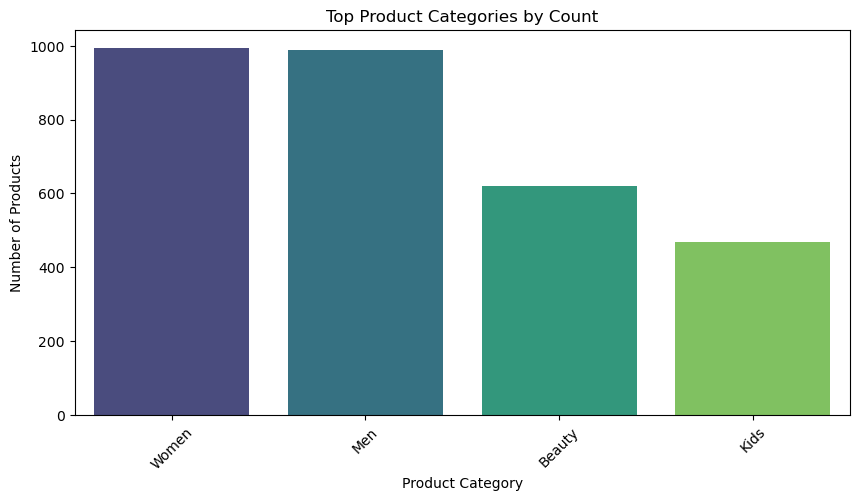

In [11]:
# Count the number of products in each Category
top_categories = products['Category'].value_counts().head()

# Display the result
print("Top Product Categories by Count:")
print(top_categories)

# Plot the top categories
plt.figure(figsize=(10, 5))
sns.barplot(x = top_categories.index, y=top_categories.values, hue = top_categories.index,palette="viridis",legend=False)
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.title("Top Product Categories by Count")
plt.show()

In [12]:
orders["Total Price"] = orders["Original Price"] - (orders["Original Price"]* orders["Discount%"])
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Total Price
0,OD0001,C001,P0001,2021-05-20,349,0.30,244.30
1,OD0002,C002,P0001,2021-01-19,350,0.30,245.00
2,OD0003,C003,P0001,2021-10-28,351,0.30,245.70
3,OD0004,C004,P0001,2021-05-20,352,0.25,264.00
4,OD0005,C005,P0001,2022-11-08,353,0.25,264.75
...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,342.50
3496,OD3497,C082,P3071,2022-07-08,707,0.50,353.50
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,909.50
3498,OD3499,C084,P3071,2021-07-18,856,0.50,428.00


In [13]:
df = pd.merge(left=orders, right=products, how="inner", on="Product ID")
df

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Total Price,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,OD0001,C001,P0001,2021-05-20,349,0.30,244.30,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,OD0002,C002,P0001,2021-01-19,350,0.30,245.00,Women,Topwear,T-Shirts,Roadster,40,Black,4
2,OD0003,C003,P0001,2021-10-28,351,0.30,245.70,Women,Topwear,T-Shirts,Roadster,40,Black,4
3,OD0004,C004,P0001,2021-05-20,352,0.25,264.00,Women,Topwear,T-Shirts,Roadster,40,Black,4
4,OD0005,C005,P0001,2022-11-08,353,0.25,264.75,Women,Topwear,T-Shirts,Roadster,40,Black,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,342.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3496,OD3497,C082,P3071,2022-07-08,707,0.50,353.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,909.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3498,OD3499,C084,P3071,2021-07-18,856,0.50,428.00,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4


# ***How does the price distribution vary across different product categories?***

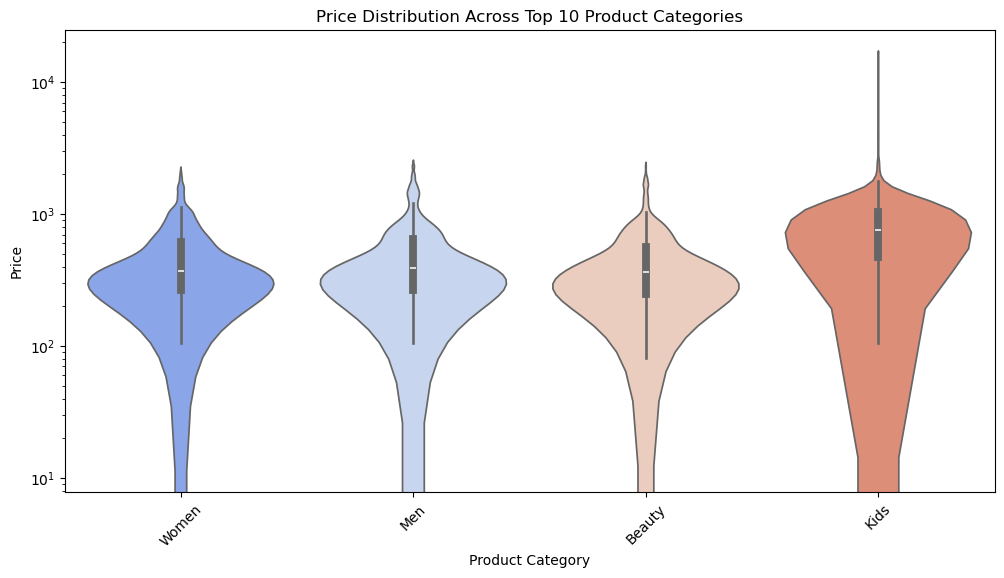

In [14]:
# Merge price data from orders into products
df_merged = orders.merge(products, on="Product ID", how='left')

# Price distribution across different categories
top_categories = products['Category'].value_counts().head(10).index
df_top_categories = df_merged[df_merged['Category'].isin(top_categories)]

#Visualization
plt.figure(figsize=(12, 6))
sns.violinplot(x='Category', y='Total Price', data=df_top_categories, hue='Category', palette="coolwarm", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Price")
plt.title("Price Distribution Across Top 10 Product Categories")
plt.yscale("log")  # Log scale to handle large price variations
plt.show()


# ***What are the top 10 most expensive and least expensive products?***

In [15]:
#Top 10 Most Expensive products
print("Top 10 Most Expensive Products:")
print(df_merged.nlargest(10, 'Total Price'))

#Top 10 Least Expensive products
print("Top 10 Least Expensive Products:")
print(df_merged.nsmallest(10, 'Total Price'))

Top 10 Most Expensive Products:
     Order ID Customer ID Product ID       Date  Original Price  Discount%  \
3452   OD3453        C038      P3053 2021-02-17           22365       0.25   
3457   OD3458        C043      P3054 2022-02-02            6523       0.40   
3464   OD3465        C050      P3056 2021-05-17            4454       0.45   
3465   OD3466        C051      P3057 2022-03-10            4454       0.45   
545    OD0546        C031      P0458 2023-01-10            3654       0.35   
3463   OD3464        C049      P3055 2021-09-11            4235       0.45   
289    OD0290        C090      P0248 2021-10-13            2698       0.15   
496    OD0497        C082      P0418 2022-12-17            2698       0.15   
540    OD0541        C026      P0453 2022-10-09            2698       0.15   
1002   OD1003        C088      P0852 2022-01-06            2698       0.15   

      Total Price Category Sub-category  Product Name Brand Name    Size  \
3452     16773.75     Kids     Fo

# ***What is the distribution of customers based on location, age group?***

Customer Locations Distribution:
City
Bengaluru    8
Ahmedabad    6
Jaipur       6
Patiala      6
Prayagraj    6
Amritsar     5
Pune         5
Vadodara     5
Jalandhar    4
Aligarh      4
Name: count, dtype: int64


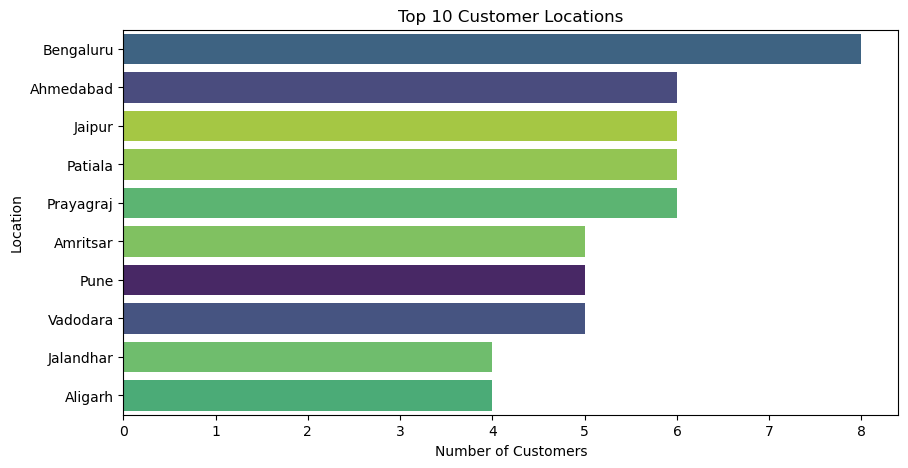

In [16]:
print("Customer Locations Distribution:")
print(customers['City'].value_counts().head(10))

plt.figure(figsize=(10,5))
sns.countplot(y=customers['City'], order=customers['City'].value_counts().index[:10],hue = customers['City'],legend=False, palette="viridis")
plt.title("Top 10 Customer Locations")
plt.xlabel("Number of Customers")
plt.ylabel("Location")
plt.show()

Customer Age Group Distribution:
Customer Age
24    12
18     9
22     9
29     6
19     6
23     5
25     5
27     4
17     3
35     3
36     3
26     3
20     3
30     2
40     2
37     2
45     2
44     2
16     2
21     2
42     1
41     1
15     1
43     1
28     1
32     1
31     1
33     1
46     1
48     1
47     1
49     1
34     1
38     1
39     1
Name: count, dtype: int64


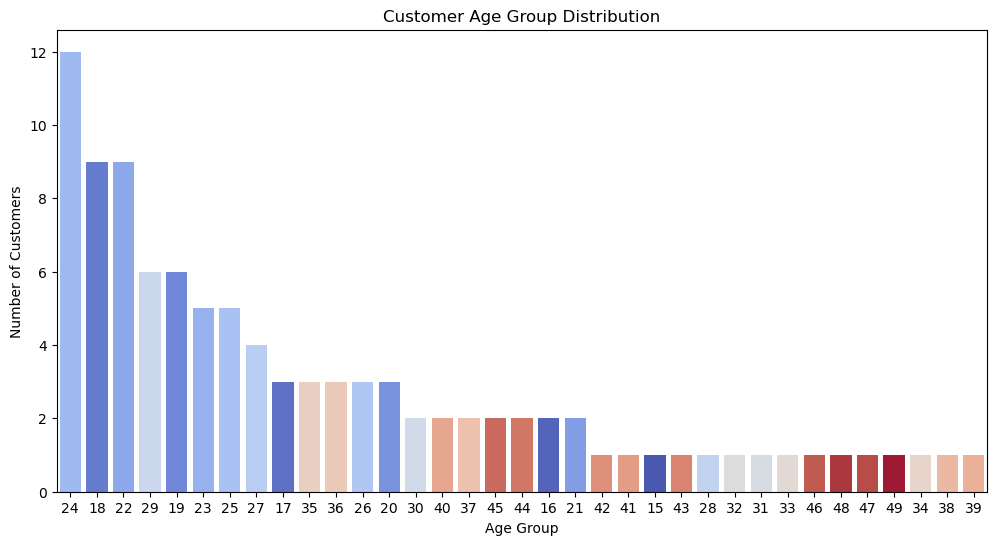

In [32]:
# Check if 'age' exists
if 'age' in customers.columns:
    # Convert 'age' column to numeric, forcing errors to NaN
    customers['age'] = pd.to_numeric(customers['age'], errors='coerce')

    # Drop NaN values that resulted from non-numeric values
    customers=customers.dropna(subset=['age'])

    # Convert age to integer
    customers['age'] = customers['age'].astype(int)

    # Creating age groups
    customers['Customer Age'] = pd.cut(customers['age'],
                                       bins=[0, 18, 25, 35, 45, 60, 100],
                                       labels=["0-18", "19-25", "26-35", "36-45", "46-60", "60+"])

    print(customers[['age', 'Customer Age']].head())

print("Customer Age Group Distribution:")
print(customers['Customer Age'].value_counts())

plt.figure(figsize=(12,6))
sns.countplot(x=customers['Customer Age'], order=customers['Customer Age'].value_counts().index,palette="coolwarm",legend=False,hue=customers['Customer Age'])
plt.title("Customer Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()

# ***Do customers from a specific location spend more on average?***

Top Locations by Average Spending:
City
Patna        658.562357
Vadodara     640.085429
Hyderabad    586.268429
Indore       577.872429
Pune         571.165543
Kanpur       569.644357
Mumbai       557.002286
Bengaluru    555.123179
Aligarh      552.811000
Surat        544.896571
Name: Total Price, dtype: float64


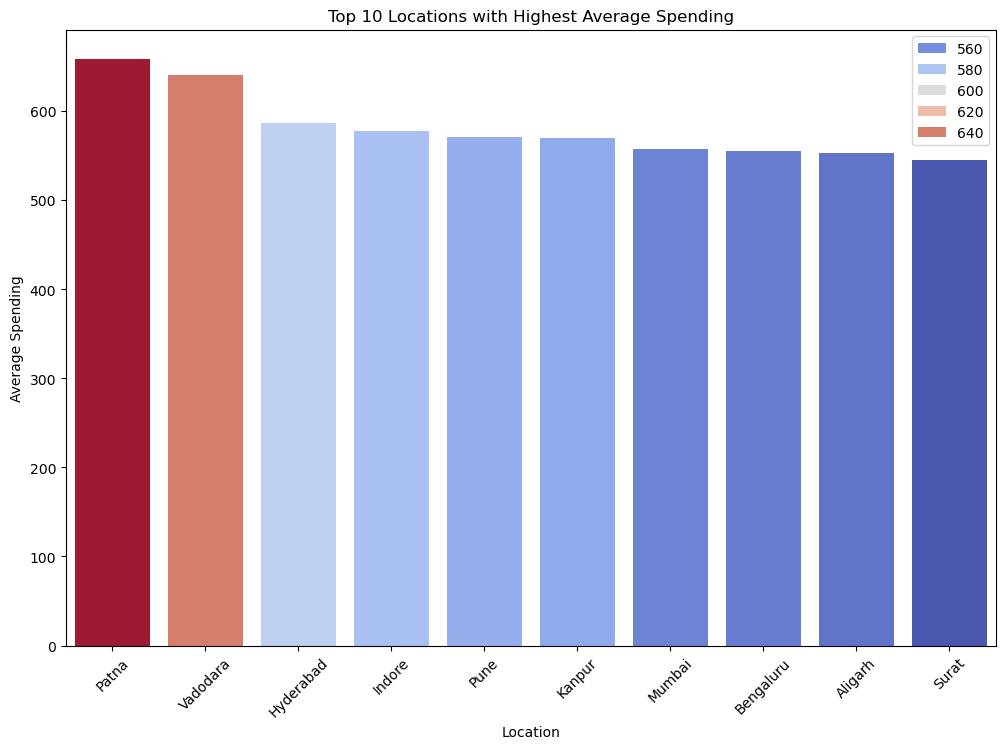

In [33]:
# Merge customers and orders data
df_customer_orders = orders.merge(customers, on='Customer ID', how='left')

# Calculate average spending per location
location_avg_spending = df_customer_orders.groupby('City')['Total Price'].mean().sort_values(ascending=False)

# Display top locations with highest average spending
print("Top Locations by Average Spending:")
print(location_avg_spending.head(10))

# Plot the top 10 spending locations
plt.figure(figsize=(12, 8))
sns.barplot(x=location_avg_spending.head(10).index, y=location_avg_spending.head(10).values,hue=location_avg_spending.head(10).values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Average Spending")
plt.title("Top 10 Locations with Highest Average Spending")
plt.show()

In [34]:
orders["Month"] = orders["Date"].dt.strftime("%B")
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Total Price,Month
0,OD0001,C001,P0001,2021-05-20,349,0.30,244.30,May
1,OD0002,C002,P0001,2021-01-19,350,0.30,245.00,January
2,OD0003,C003,P0001,2021-10-28,351,0.30,245.70,October
3,OD0004,C004,P0001,2021-05-20,352,0.25,264.00,May
4,OD0005,C005,P0001,2022-11-08,353,0.25,264.75,November
...,...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,342.50,January
3496,OD3497,C082,P3071,2022-07-08,707,0.50,353.50,July
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,909.50,February
3498,OD3499,C084,P3071,2021-07-18,856,0.50,428.00,July


In [35]:
gb = orders.groupby("Month").agg({"Total Price":"sum"})
gb

,Total Price
Month,
April,123333.24
August,151195.18
December,149565.59
February,202941.95
January,232189.61
July,137832.60
June,140366.13
March,211853.22
May,156812.99


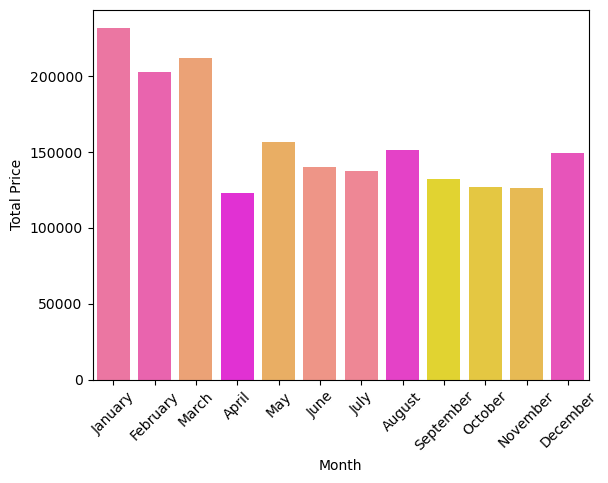

In [37]:
#plt.figure(figsize=(12,5))
sns.barplot(x = gb.index, y = gb["Total Price"], order =["January","February","March","April","May","June","July","August","September","October","November","December"],hue = gb.index, palette = 'spring')
plt.xticks(rotation = 45)
plt.show()

# ***What are the most commonly ordered products?***

Top 10 Most Ordered Products:
  Product ID Product Name  order_count
0      P3071      Sandals           10
1      P3054      Sandals           10
2      P0434      Jackets           10
3      P2642       Shorts           10
4      P3068      Sandals            9
5      P1192        Suits            9
6      P1523        Jeans            9
7      P2934   Winterwear            8
8      P0754       Shorts            8
9      P0388      Jackets            8


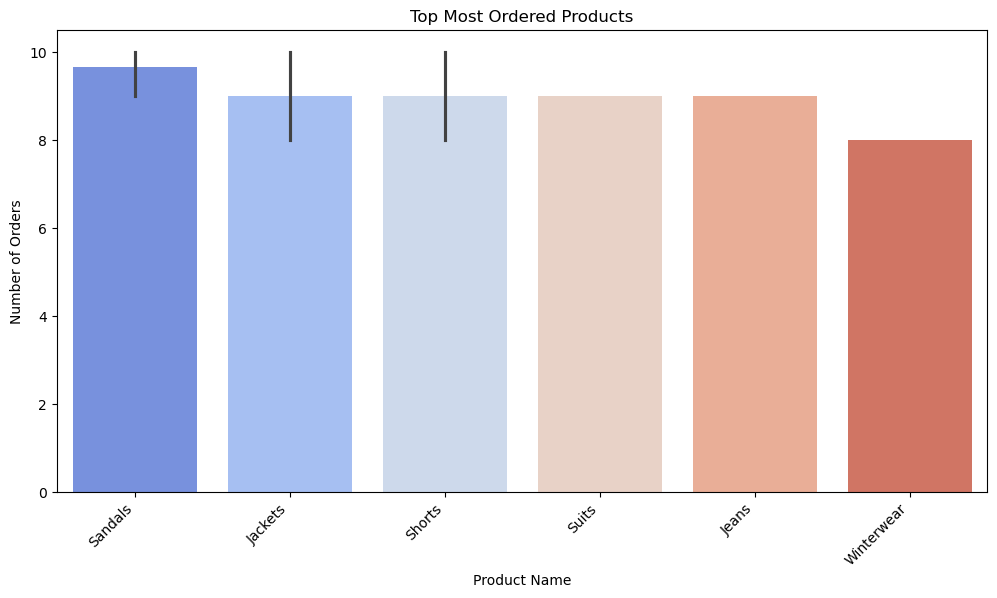

In [39]:
# Count the number of times each product was ordered
product_order_counts = orders['Product ID'].value_counts().reset_index()
product_order_counts.columns = ['Product ID', 'order_count']

# Merge with product details to get product names
most_ordered_products = product_order_counts.merge(products, on='Product ID', how='left')

# Display the top 10 most ordered products
print("Top 10 Most Ordered Products:")
print(most_ordered_products[['Product ID', 'Product Name', 'order_count']].head(10))

# Plot the top 10 most ordered products
plt.figure(figsize=(12, 6))
sns.barplot(x=most_ordered_products['Product Name'][:10], y=most_ordered_products['order_count'][:10],hue=most_ordered_products['Product Name'][:10], palette="coolwarm",legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Product Name")
plt.ylabel("Number of Orders")
plt.title("Top Most Ordered Products")
plt.show()

In [40]:
gb1 = df.groupby("Category").agg({"Total Price":"sum"})
gb1

,Total Price
Category,
Beauty,312016.36
Kids,445682.43
Men,586456.23
Women,546934.66


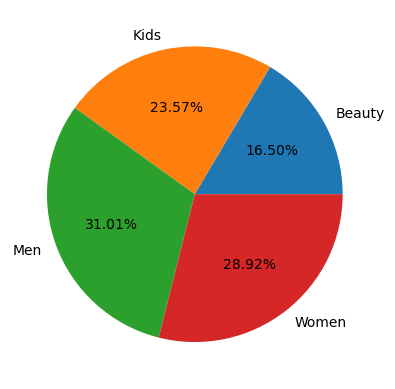

In [43]:
plt.pie(gb1["Total Price"], labels = gb1.index, autopct = "%1.2f%%")
plt.show()

In [34]:
df["Total Price"].sum()

np.float64(1891089.6800000002)